In [1]:
!apt update && apt install -y openslide-tools
!pip install openslide-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,009 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,

In [2]:
import os
import openslide

from google.colab import drive

# Mount the Google Drive to access the files
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [4]:
# Set the working directory and slide path
work_directory = "/content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/"
slide_path = os.path.join(
    work_directory, "4 Class", "sinovyal-sarkom", "B-18355-2020-22.svs"
)

In [5]:
slide = openslide.OpenSlide(slide_path)

In [6]:
slide.properties

<_PropertyMap {'aperio.AppMag': '40', 'aperio.Date': '03/24/23', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '45', 'aperio.Filename': 'B-18355-2020-22', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'AT2', 'aperio.ImageID': '1030775', 'aperio.Left': '9.055426', 'aperio.LineAreaXOffset': '-0.013109', 'aperio.LineAreaYOffset': '0.004258', 'aperio.LineCameraSkew': '0.000154', 'aperio.MPP': '0.2532', 'aperio.OriginalHeight': '83039', 'aperio.OriginalWidth': '193040', 'aperio.ScanScope ID': 'SS7837', 'aperio.SessonMode': 'NR', 'aperio.StripeWidth': '2032', 'aperio.Time': '19:49:08', 'aperio.Time Zone': 'GMT+03:00', 'aperio.Top': '21.881563', 'aperio.User': '5a94c109-0746-4e83-bf7c-43c9d5b5371d', 'openslide.comment': 'Aperio Image Library v12.0.16 \r\n193040x83039 [0,100 189240x82939] (240x240) JPEG/RGB Q=70|AppMag = 40|StripeWidth = 2032|ScanScope ID = SS7837|Filename = B-18355-2020-22|Date = 03/24/23|Time = 19:49:08|Time Zone = GMT+0

In [7]:
slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER]

'40'

In [8]:
slide.dimensions

(189240, 82939)

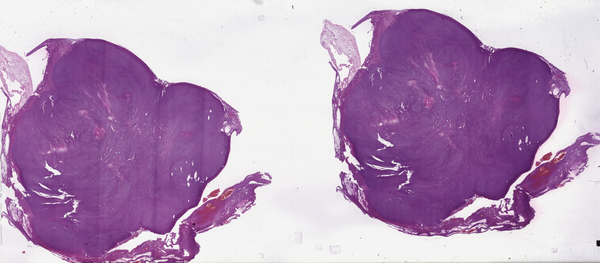

In [9]:
slide.get_thumbnail(size=(600, 600)).show()

In [10]:
dims = slide.level_dimensions
dims

((189240, 82939), (47310, 20734), (11827, 5183), (2956, 1295))

In [11]:
slide.level_downsamples

(1.0, 4.000072344940677, 16.001399370671862, 64.03225218259048)

In [12]:
level3_dim = dims[2]
# Give pixel coordinates (top left pixel in the original large image)
# Also give the level number (for level 3 we are providing a valueof 2)
# Size of your output image
# Remember that the output would be a RGBA image (Not, RGB)
level3_img = slide.read_region((0, 0), 2, level3_dim)  # Pillow object, mode=RGBA

In [ ]:
# Convert the image to RGB
level3_img_RGB = level3_img.convert("RGB")
level3_img_RGB.show()

In [ ]:
level3_img_RGB.size

(9462, 2837)

In [ ]:
associated_images = slide.associated_images

In [ ]:
print("Associated images:")
for name in associated_images.keys():
    print(name)

Associated images:
label
macro
thumbnail


In [ ]:
thumbnail = associated_images["thumbnail"]
thumbnail.size
type(thumbnail)

PIL.Image.Image

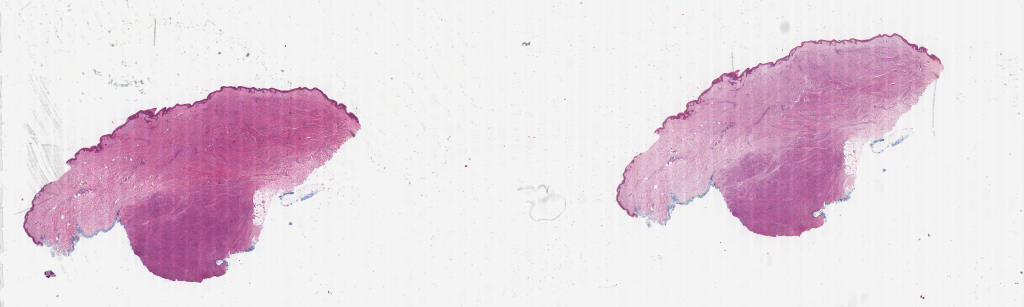

In [ ]:
thumbnail.show()

In [ ]:
label = associated_images["label"]
label.size

(679, 743)

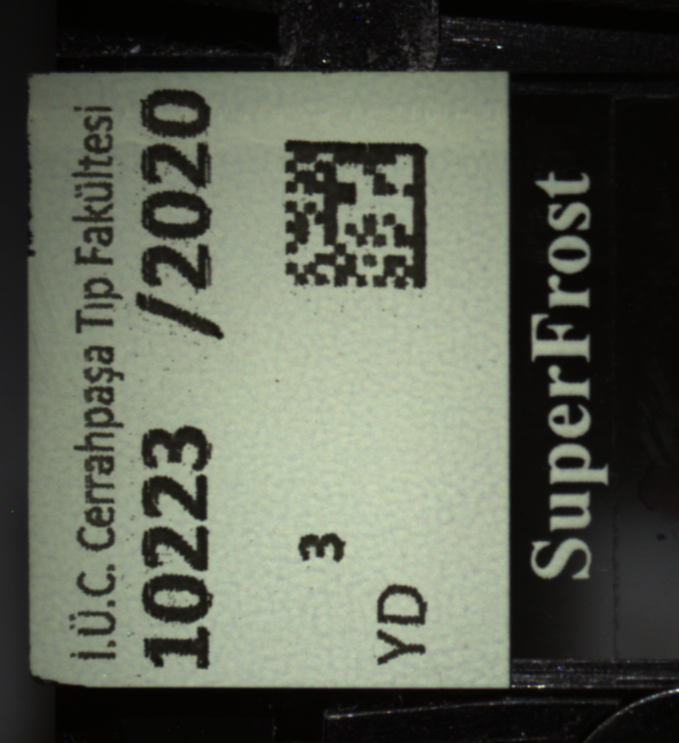

In [ ]:
label.show()

In [ ]:
macro = associated_images["macro"]

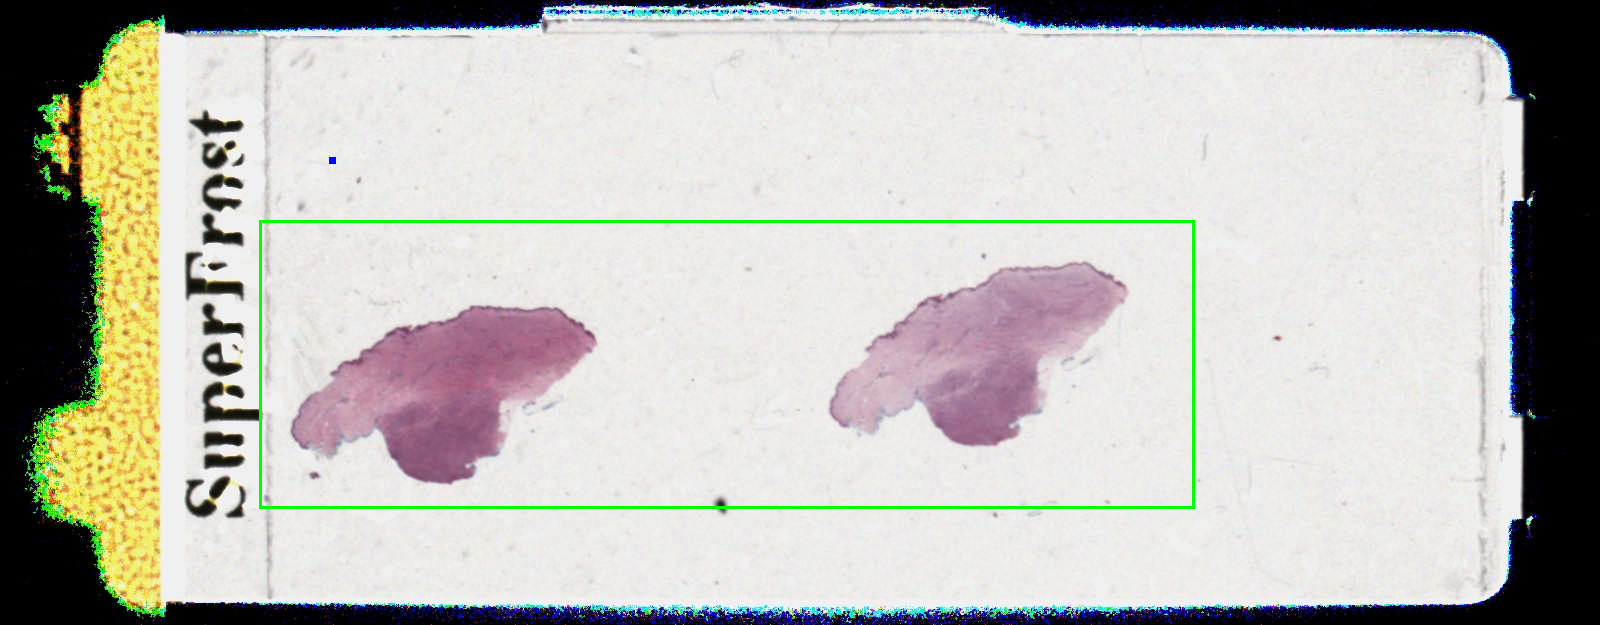

In [ ]:
macro.show()

In [ ]:
macro.size

(1600, 625)